/tmp/ipython-input-1014390365.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx864yy51/kmic0k1t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx864yy51/o0z42xpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26867', 'data', 'file=/tmp/tmpx864yy51/kmic0k1t.json', 'init=/tmp/tmpx864yy51/o0z42xpc.json', 'output', 'file=/tmp/tmpx864yy51/prophet_modelqmwnyaao/prophet_model-20250925155219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start

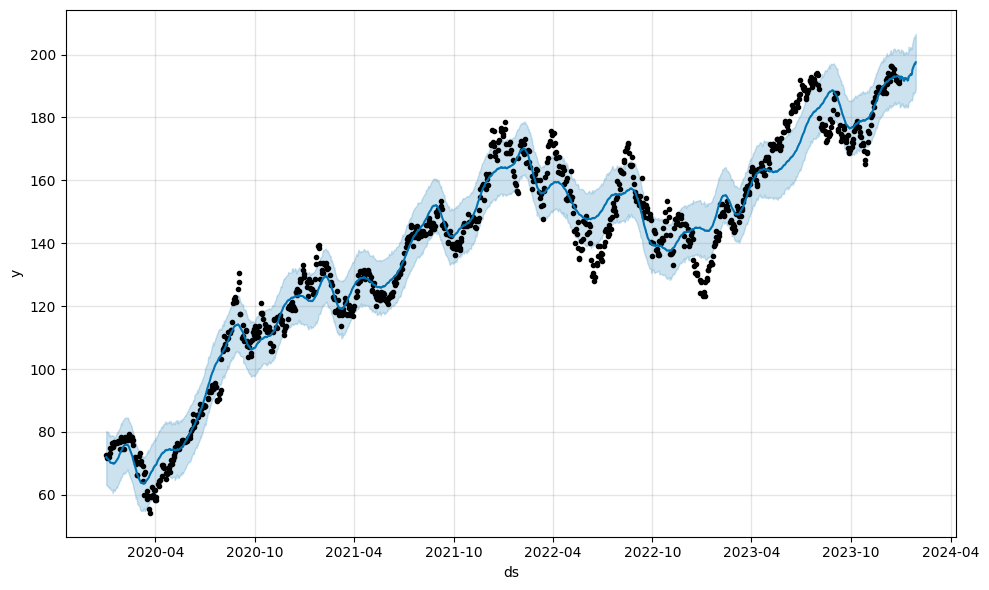

In [1]:
# Install required packages
!pip install yfinance prophet plotly

import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Download stock data
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")

# Prepare data for Prophet
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Facebook Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create future dataframe
future = model_prophet.make_future_dataframe(periods=30)
forecast = model_prophet.predict(future)

# Plot results
fig = model_prophet.plot(forecast)